In [24]:
import pandas as pd

data =  pd.read_csv("titanic.csv")
df= data


# Q1


In [25]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Q2

Số lượng dữ liệu thiếu trên mỗi cột:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


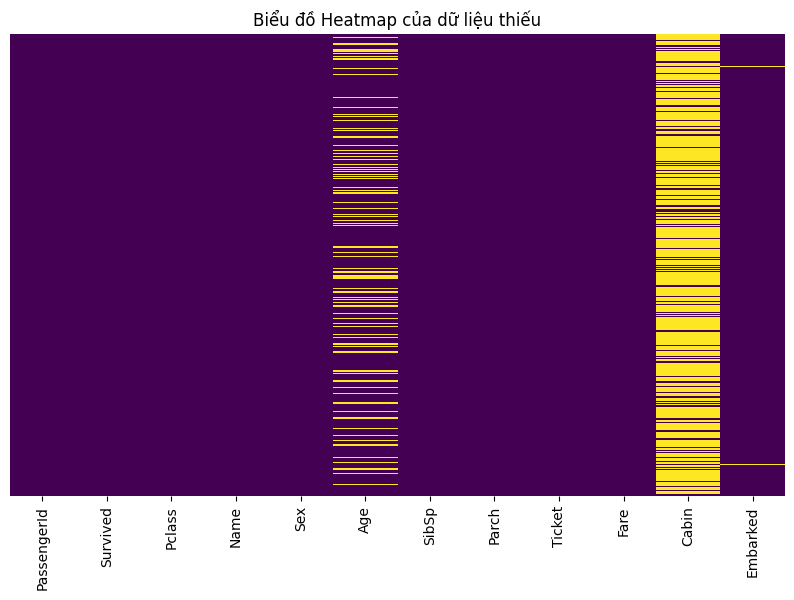

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



missing_values = df.isnull().sum()
print("Số lượng dữ liệu thiếu trên mỗi cột:")
print(missing_values)


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap của dữ liệu thiếu")
plt.show()


# Q3

In [27]:
df['firstName'] = df['Name'].apply(lambda x: x.split(',')[0])
df['secondName'] = df['Name'].apply(lambda x: x.split(',')[1])

df.drop(columns=['Name',], inplace=True)

df[['firstName', 'secondName']].head()


,firstName,secondName
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


# Q4

In [28]:
df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})


df[['Sex']].head()


,Sex
0,M
1,F
2,F
3,F
4,M


# Q5a

/var/folders/8_/fl08gppj6q30h3nrwn1kc9140000gn/T/ipykernel_97057/3141961381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette="coolwarm")


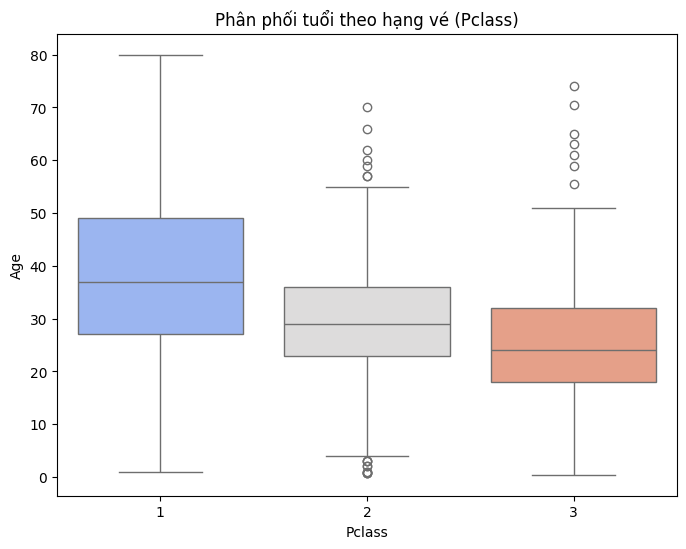

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette="coolwarm")
plt.title("Phân phối tuổi theo hạng vé (Pclass)")
plt.show()


# Q5b

In [30]:

age_median_by_pclass = df.groupby('Pclass')['Age'].median()


df['Age'] = df.apply(lambda row: age_median_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age'], axis=1)


print("Số lượng dữ liệu thiếu sau khi xử lý:")
print(df.isnull().sum())


Số lượng dữ liệu thiếu sau khi xử lý:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
firstName        0
secondName       0
dtype: int64


Dữ liệu thiếu trước khi thay thế Age:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
firstName        0
secondName       0
dtype: int64
Dữ liệu sau khi thay thế Age bị thiếu:
   PassengerId  Pclass   Age
0            1       3  22.0
1            2       1  38.0
2            3       3  26.0
3            4       1  35.0
4            5       3  35.0
5            6       3  24.0
6            7       1  54.0
7            8       3   2.0
8            9       3  27.0
9           10       2  14.0


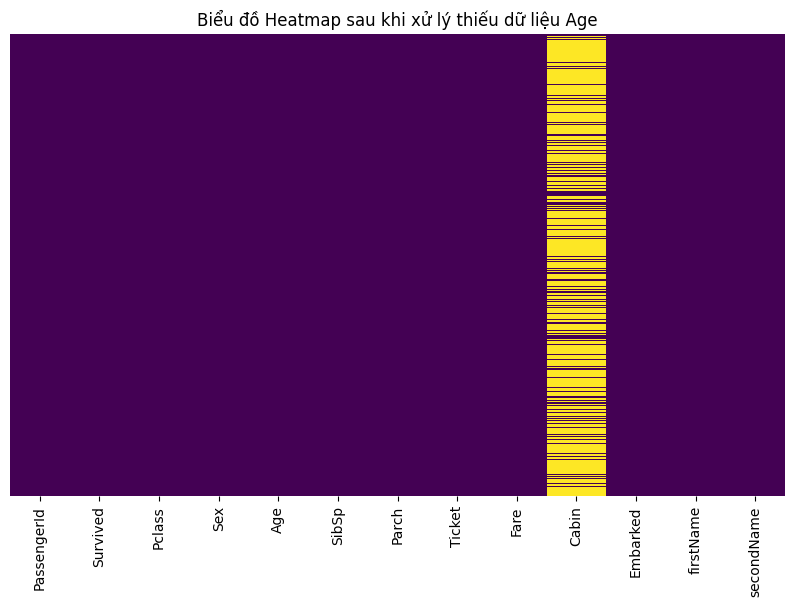

In [31]:

print("Dữ liệu thiếu trước khi thay thế Age:")
print(df.isnull().sum())

print("Dữ liệu sau khi thay thế Age bị thiếu:")
print(df[['PassengerId', 'Pclass', 'Age']].head(10))

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap sau khi xử lý thiếu dữ liệu Age")
plt.show()


# Q6

In [32]:

def categorize_age(age):
    if age <= 12:
        return 'Kid'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Older'

df['AgeGroup'] = df['Age'].apply(categorize_age)


df[['PassengerId', 'Age', 'AgeGroup']].head(10)


,PassengerId,Age,AgeGroup
0,1,22.0,Adult
1,2,38.0,Adult
2,3,26.0,Adult
3,4,35.0,Adult
4,5,35.0,Adult
5,6,24.0,Adult
6,7,54.0,Adult
7,8,2.0,Kid
8,9,27.0,Adult
9,10,14.0,Teen


# Q7

In [33]:

df['namePrefix'] = df['secondName'].str.extract(r' ([A-Za-z]+)\.')


df[['PassengerId', 'secondName', 'namePrefix']].head(10)


,PassengerId,secondName,namePrefix
0,1,Mr. Owen Harris,Mr
1,2,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,Miss. Laina,Miss
3,4,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,Mr. William Henry,Mr
5,6,Mr. James,Mr
6,7,Mr. Timothy J,Mr
7,8,Master. Gosta Leonard,Master
8,9,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,Mrs. Nicholas (Adele Achem),Mrs


# Q8

In [34]:
df['familySize'] = df['SibSp'] + df['Parch'] + 1  


df[['PassengerId', 'SibSp', 'Parch', 'familySize']].head(10)


,PassengerId,SibSp,Parch,familySize
0,1,1,0,2
1,2,1,0,2
2,3,0,0,1
3,4,1,0,2
4,5,0,0,1
5,6,0,0,1
6,7,0,0,1
7,8,3,1,5
8,9,0,2,3
9,10,1,0,2


# Q9

In [35]:
df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 1 else 0)


df[['PassengerId', 'familySize', 'Alone']].head(10)


,PassengerId,familySize,Alone
0,1,2,0
1,2,2,0
2,3,1,1
3,4,2,0
4,5,1,1
5,6,1,1
6,7,1,1
7,8,5,0
8,9,3,0
9,10,2,0


# Q10

In [36]:

df['typeCabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else "Unknown")

df[['PassengerId', 'Cabin', 'typeCabin']].head(10)


,PassengerId,Cabin,typeCabin
0,1,NaN,Unknown
1,2,C85,C
2,3,NaN,Unknown
3,4,C123,C
4,5,NaN,Unknown
5,6,NaN,Unknown
6,7,E46,E
7,8,NaN,Unknown
8,9,NaN,Unknown
9,10,NaN,Unknown


# Q11

In [37]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

duplicate_passengers = set(train_df["PassengerId"]) & set(test_df["PassengerId"])

test_df = test_df[~test_df["PassengerId"].isin(duplicate_passengers)]

train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

# Q12

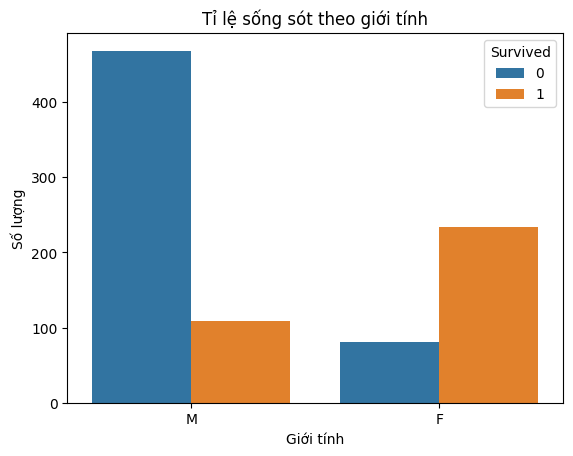

In [38]:
sns.countplot(data=df, x="Sex", hue="Survived")

plt.title("Tỉ lệ sống sót theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.show()

# Q13

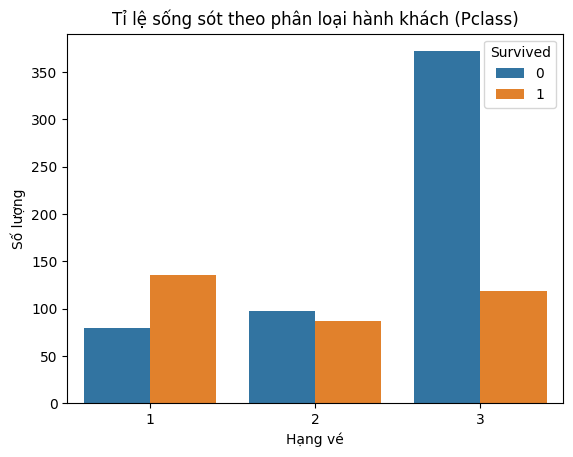

In [39]:
sns.countplot(data=df, x="Pclass", hue="Survived")


plt.title("Tỉ lệ sống sót theo phân loại hành khách (Pclass)")
plt.xlabel("Hạng vé")
plt.ylabel("Số lượng")
plt.show()

# Q14

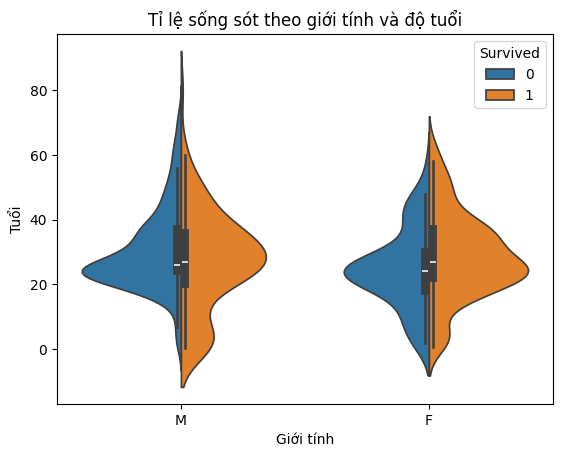

In [40]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)
plt.title("Tỉ lệ sống sót theo giới tính và độ tuổi")
plt.ylabel("Tuổi")
plt.xlabel("Giới tính")
plt.show()


# Q15

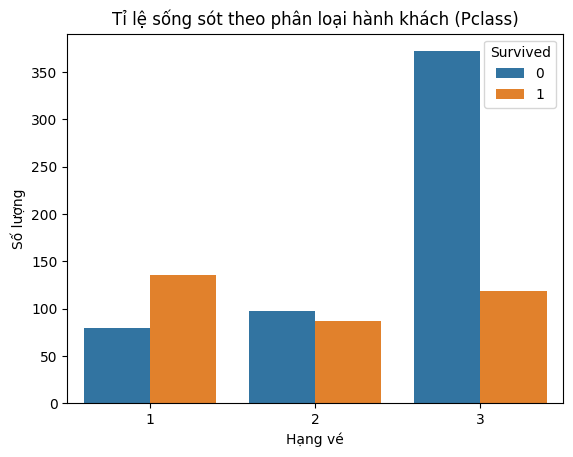

In [41]:


sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Tỉ lệ sống sót theo phân loại hành khách (Pclass)")
plt.xlabel("Hạng vé")
plt.ylabel("Số lượng")
plt.show()


# q16

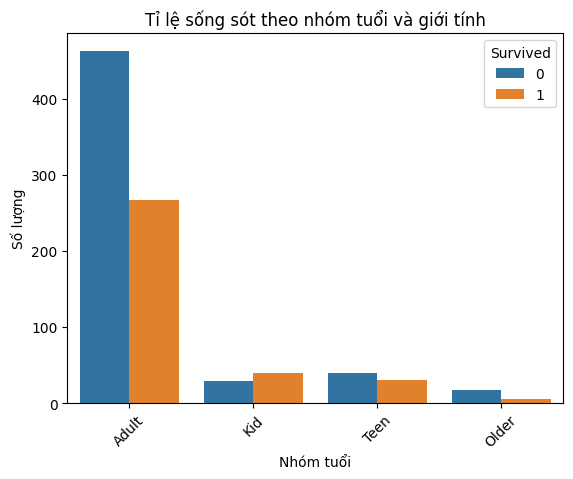

In [42]:


sns.countplot(data=df, x="AgeGroup", hue="Survived", dodge=True)
plt.title("Tỉ lệ sống sót theo nhóm tuổi và giới tính")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()


# Q17

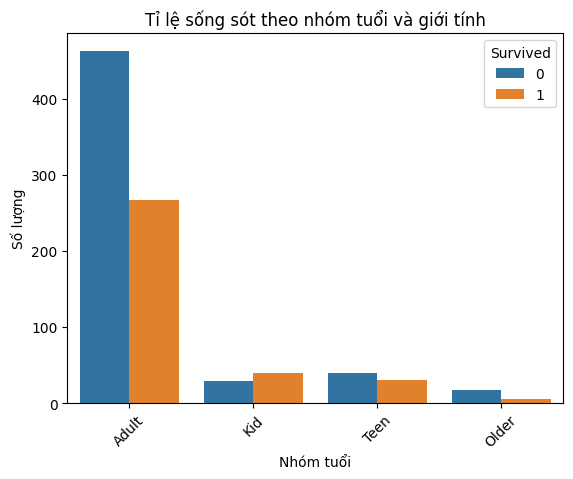

In [43]:


sns.countplot(data=df, x="AgeGroup", hue="Survived",  dodge=True)


plt.title("Tỉ lệ sống sót theo nhóm tuổi và giới tính")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()
